## CIFAR10 image classification by CNN( convolutional neural network)

## In neural networks, Convolutional neural network (ConvNets or CNNs) is one of the main categories to do images recognition, images classifications. Objects detections, recognition faces etc., are some of the areas where CNNs are widely used.

## importing the libraries

In [7]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


## loading the datasets

In [10]:
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()

In [11]:
# checking the  shape of the data

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [13]:
x_train[0].shape

(32, 32, 3)

In [14]:
y_train[0].shape

(1,)

In [15]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

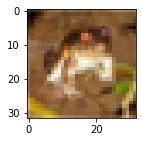

In [20]:
plt.figure(figsize=(5,2))
plt.imshow(x_train[0])

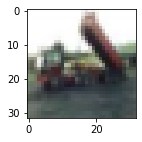

In [24]:
plt.figure(figsize=(5,2))
plt.imshow(x_train[2])

In [26]:
y_train[0:5]  # since its a 2 dimesnional array , will just convert into one dimensional

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [27]:
y_train = y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [28]:
y_train[0:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [29]:
# y represents the classes of each figure
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [33]:
# now plotting a figure for each classes with label
def plot_sample(x,y,index):
  plt.figure(figsize=(5,2))
  plt.imshow(x_train[index])
  plt.xlabel(classes[y[index]])

(None, None, None)

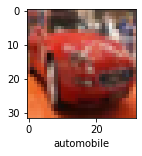

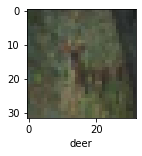

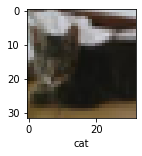

In [37]:
plot_sample(x_train,y_train,5),plot_sample(x_train,y_train,10),plot_sample(x_train,y_train,9)

## normalizing our datasets

In [41]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255


#First checking the accuracy with SIMPLE ANN

In [46]:
ann=keras.Sequential([
                      keras.layers.Flatten(input_shape=(32,32,3)),  # input shape
                      keras.layers.Dense(3000,activation="relu"),   # hidden layers
                      keras.layers.Dense(1000,activation="relu"),   # hidden layers
                      keras.layers.Dense(10,activation="sigmoid")    # output layers
])

In [47]:
ann.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [50]:
ann.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 119s 76ms/step - loss: 1.7445 - accuracy: 0.3827
Epoch 2/5
1563/1563 [==============================] - 115s 73ms/step - loss: 1.6063 - accuracy: 0.4318
Epoch 3/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.5315 - accuracy: 0.4591
Epoch 4/5
1563/1563 [==============================] - 118s 75ms/step - loss: 1.4750 - accuracy: 0.4798
Epoch 5/5
1563/1563 [==============================] - 117s 75ms/step - loss: 1.4259 - accuracy: 0.4980


## observation after ann model:

In [51]:
# accuracy comes very low that is 50%
# also the time taken by ann model is also high

## Now checking performance by CNN:

In [57]:
cnn=keras.Sequential([
                      ## cnn code
                      keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),   # first convulational + relu layers
                      keras.layers.MaxPooling2D((2,2)),                                                            # first pooling of 2*2   
                      keras.layers.Conv2D(filters=50,kernel_size=(3,3),activation="relu"),                        # second filters convulational  + relu 
                      keras.layers.MaxPooling2D((2,2)),                                                            # second pooling          
                      ## dense layers
                      keras.layers.Flatten(),                                                                     # flattening of matrix into 1d array
                      keras.layers.Dense(64,activation="relu"),                                                   # first hidden layer      
                      keras.layers.Dense(10,activation="softmax")                                                  # output layers with softmax function               


])

In [58]:
cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [60]:
%%time
cnn.fit(x_train_scaled,y_train,epochs=14)

Epoch 1/14
1563/1563 [==============================] - 64s 40ms/step - loss: 1.4706 - accuracy: 0.4702
Epoch 2/14
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1313 - accuracy: 0.6048
Epoch 3/14
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0129 - accuracy: 0.6471
Epoch 4/14
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9336 - accuracy: 0.6752
Epoch 5/14
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8771 - accuracy: 0.6950
Epoch 6/14
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8263 - accuracy: 0.7135
Epoch 7/14
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7853 - accuracy: 0.7252
Epoch 8/14
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7474 - accuracy: 0.7425
Epoch 9/14
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7103 - accuracy: 0.7514
Epoch 10/14
1563/1563 [==============================] - 62s 40m

In [62]:
cnn.evaluate(x_test_scaled,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.0071 - accuracy: 0.6878


[1.0070900917053223, 0.6877999901771545]

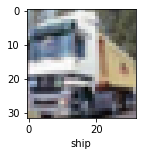

In [63]:
plot_sample(x_test,y_test,1)

In [64]:
y_pred_cnn=cnn.predict(x_test)

In [65]:
y_pred_cnn[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [66]:
y_pred_classes = [np.argmax(element) for element in y_pred_cnn]

In [67]:
y_pred_classes[:5]

[8, 8, 0, 0, 8]

In [70]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

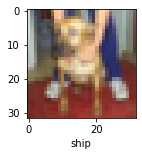

In [73]:
plot_sample(x_test_scaled, y_test,51)

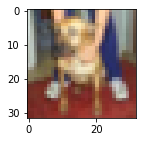

In [74]:
plt.figure(figsize=(5,2))
plt.imshow(x_train[51])

# plotting the confusion matrix

In [80]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
print("classification report after cnn model training is \n",classification_report(y_test,y_pred_classes))

classification report after cnn model training is 
               precision    recall  f1-score   support

           0       0.29      0.86      0.43      1000
           1       0.65      0.62      0.63      1000
           2       0.62      0.18      0.28      1000
           3       0.42      0.18      0.26      1000
           4       0.72      0.12      0.20      1000
           5       0.53      0.45      0.49      1000
           6       0.72      0.48      0.57      1000
           7       0.63      0.53      0.57      1000
           8       0.40      0.67      0.50      1000
           9       0.53      0.59      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.55      0.47      0.45     10000
weighted avg       0.55      0.47      0.45     10000

